# Ex9 - Decomposição QR - Ismael Marinho

In [1]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt

## Exercício 9.4

In [2]:
def oldSchoolInv(m):
    minors = np.array(m)
    grid = np.array(m)
    for i in range(len(m)):
        for j in range(len(m[0])):
            temp = np.delete(m, i, 0)
            temp = np.delete(temp, j, 1)
            minors[i][j] = sla.det(temp)

    for i in range(1, len(m) + 1):
        for j in range(1, len(m[0]) + 1):
            grid[i-1][j-1] = (-1)**(i + j)
    cofactors = minors * grid
    return cofactors.T * 1/(sla.det(m))

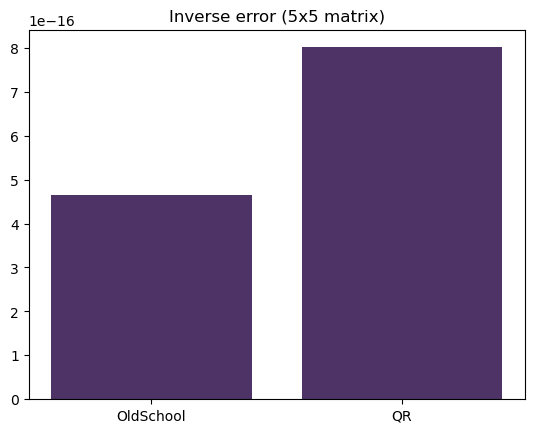

In [3]:
n = 5
A = np.random.randn(n,n)

inv_o = oldSchoolInv(A)
m_o  = inv_o @ A

Q, R = np.linalg.qr(A)
inv_qr = sla.inv(R) @ Q.T
m_qr  = inv_qr @ A



ident = np.eye(n)
erro = [0,0] 
erro[0] = np.sqrt(np.sum((m_o - ident)**2))
erro[1] = np.sqrt(np.sum((m_qr - ident )**2))

plt.bar([0, 1], erro, color = [.3,.2,.4])
plt.xticks([0, 1], labels = ['OldSchool','QR'])

plt.title(f'Inverse error ({n}x{n} matrix)', ha = 'center')
plt.show()

## Exercício 9.5

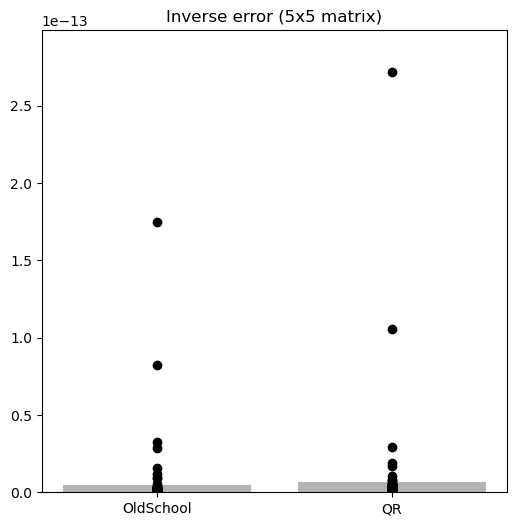

In [4]:
n = 5

erro = np.zeros((100,2))

for i in range(100):

    A = np.random.randn(n,n)

    inv_o = oldSchoolInv(A)
    m_o  = inv_o @ A

    Q,R = np.linalg.qr(A)
    inv_qr = sla.inv(R)@ Q.T 

    m_qr  = inv_qr @ A

    ident = np.eye(n)
    erro[i, 0] = np.sqrt(np.sum((m_o - ident)**2))
    erro[i, 1] = np.sqrt(np.sum((m_qr - ident )**2))


plt.figure(figsize=(6,6))

plt.plot(np.zeros(100), erro[:,0], 'ko')
plt.plot(np.ones(100), erro[:,1], 'ko')
plt.bar(range(2), np.mean(erro, axis=0), color=[.7,.7,.7])

plt.xticks(range(2),labels=['OldSchool','QR'])
plt.ylim([0, np.max(erro)*1.1])

plt.title(f'Inverse error ({n}x{n} matrix)', ha='center')
plt.show()